<a href="https://colab.research.google.com/github/JGuarnizo/Coding_Dojo/blob/main/Machine_Learning/Week6_Decision_Trees/Ejercicio_Bosque_Aleatorio_JG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de predicción de precios de viviendas
* Por: José Guarnizo
* Fecha: 13/02/2022
* TAREA

Kaggle alberga un conjunto de datos que contiene los precios de venta de viviendas para el condado de King, que incluye Seattle. Puedes descargar el conjunto de datos de Kaggle. Tu tarea es realizar bagged trees y técnicas de regresión forestal aleatoria en el conjunto de datos para predecir el precio a partir de sus características.


## Código

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Machine_Learning/Week6_Decision_Trees/kc_house_data.csv")
df.info()

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
#Matriz de correlación
df.drop(columns=["date","id"]).corr().sort_values(by="price", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.731870,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.014274,0.006157,-0.014941,0.114084,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419


In [31]:
#Definición de matriz de características 
#Se elimina, variable id & date
X=df.drop(columns=["price","date","id"])
X.shape

(21613, 18)

In [32]:
#Definición de target vector
y=df.price.values
y.shape

(21613,)

In [33]:
#División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [39]:
#Búsqueda del n_estimator para lograr la mejor precisión
estimator_range = list(range(10, 310, 10))
scores = []

for estimator in estimator_range:
    reg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_test, y_test))

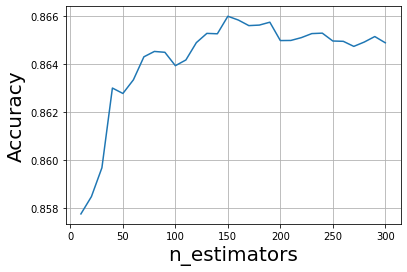

In [41]:
#Gráfica de los distintos random forests con n_estimators variaando entre 10-300
#Se observa mejor resultado con n_estimators=150
plt.plot(estimator_range, scores)
plt.xlabel('n_estimators', fontsize =20)
plt.ylabel('Accuracy', fontsize = 20)
plt.grid();

In [54]:
#Con resultado de gráfica anterior,se define modelo con n_estimators=150
reg = RandomForestRegressor(n_estimators=150, oob_score=True, random_state=1)
reg.fit(X_train, y_train)
score=reg.score(X_test,y_test)
obb=reg.oob_score_
print(" Score:",score,"\n","OBB_Score",obb)

 Score: 0.8660101915913371 
 OBB_Score 0.8752767377382544


In [48]:
# Se desea observar cómo afecta el hiperparámetro max_features en el modelo.
# Se realiza distintos modelos con n_estimators=150 y max_features varía entre 10 a 18
scores1=[]
for i in range(10,19):
  reg = RandomForestRegressor(n_estimators=150, random_state=1, max_features=i)
  reg.fit(X_train, y_train)
  scores1.append(reg.score(X_test, y_test))

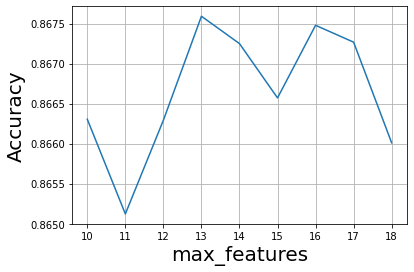

In [49]:
# Gráfica del modelo random forest con n_estimators=150 y max_features varía entre 10 a 18
# Se observa que con max_features = 13 se obtiene mejor precisión
plt.plot(range(10,19), scores1)
plt.xlabel('max_features', fontsize =20)
plt.ylabel('Accuracy', fontsize = 20)
plt.grid();

In [55]:
#RESULTADO FINAL
#Con resultado de gráfica anterior,se define modelo con n_estimators=150 y max_features=13
reg = RandomForestRegressor(n_estimators=150, oob_score=True, random_state=1, max_features=13)
reg.fit(X_train, y_train)
score=reg.score(X_test,y_test)
obb=reg.oob_score_
print("RESULTADO FINAL n_estimators=150 y max_features=13")
print(" Score:",score,"\n","OBB_Score:",obb)

RESULTADO FINAL n_estimators=150 y max_features=13
 Score: 0.8675917839204352 
 OBB_Score: 0.8794699612804622


## Preguntas

1. **¿Cuáles son las características más importantes de tu modelo?**

Las características más importantes, analizando la matriz de correlación, son:
* sqft_living
* grade
* sqft_above
* sqft_living15
* bathrooms

Todas ellas tienen una correlación mayor a 0.5 con respecto a price

2. **¿Qué otros parámetros podrías haber intentado ajustar?**

Se ajusta max_features, lo que da un poco más de aleatoriedad. Se observa que con valor de 13 se tiene mejor precisión, pasa de 0.866 a 0.867

Esta idea se obtuvo de https://stats.stackexchange.com/questions/461239/bagging-classifier-vs-randomforestclassifier